In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# change the font size of plot
plt.rcParams.update({'font.size': 16})

In [3]:
building = pd.read_csv('data/building_metadata.csv')
weather_train = pd.read_csv('data/weather_train.csv')
weather_test = pd.read_csv('data/weather_test.csv')

In [4]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [5]:
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [6]:
weather_train.query("site_id==0")

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
8779,0,2016-12-31 19:00:00,22.8,NaN,10.0,0.0,1021.7,140.0,5.7
8780,0,2016-12-31 20:00:00,23.3,NaN,8.9,0.0,1021.0,170.0,4.1
8781,0,2016-12-31 21:00:00,23.3,NaN,10.0,0.0,1021.1,150.0,4.1
8782,0,2016-12-31 22:00:00,22.8,NaN,10.0,0.0,1021.1,160.0,3.1


In [7]:
np.sum(building.floor_count.isnull())

1094

#### create a plot method that could give me a quick look for variable feature

In [8]:
def draw_histograms(df, columns, missing_columns, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(columns):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        if building.building_id.dtypes == 'object':
            df[var_name].value_counts().plot.bar(ax=ax, color = 'green', alpha = 0.5, figsize = (40,200))
        else:
            df[var_name].hist(bins=40, ax=ax, color = 'green', alpha = 0.5, figsize = (40,200))
        title = var_name + "--NaN:" + str(missing_columns[var_name])
        ax.set_title(title, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0,0.03, 1, 0.95])
    plt.show()

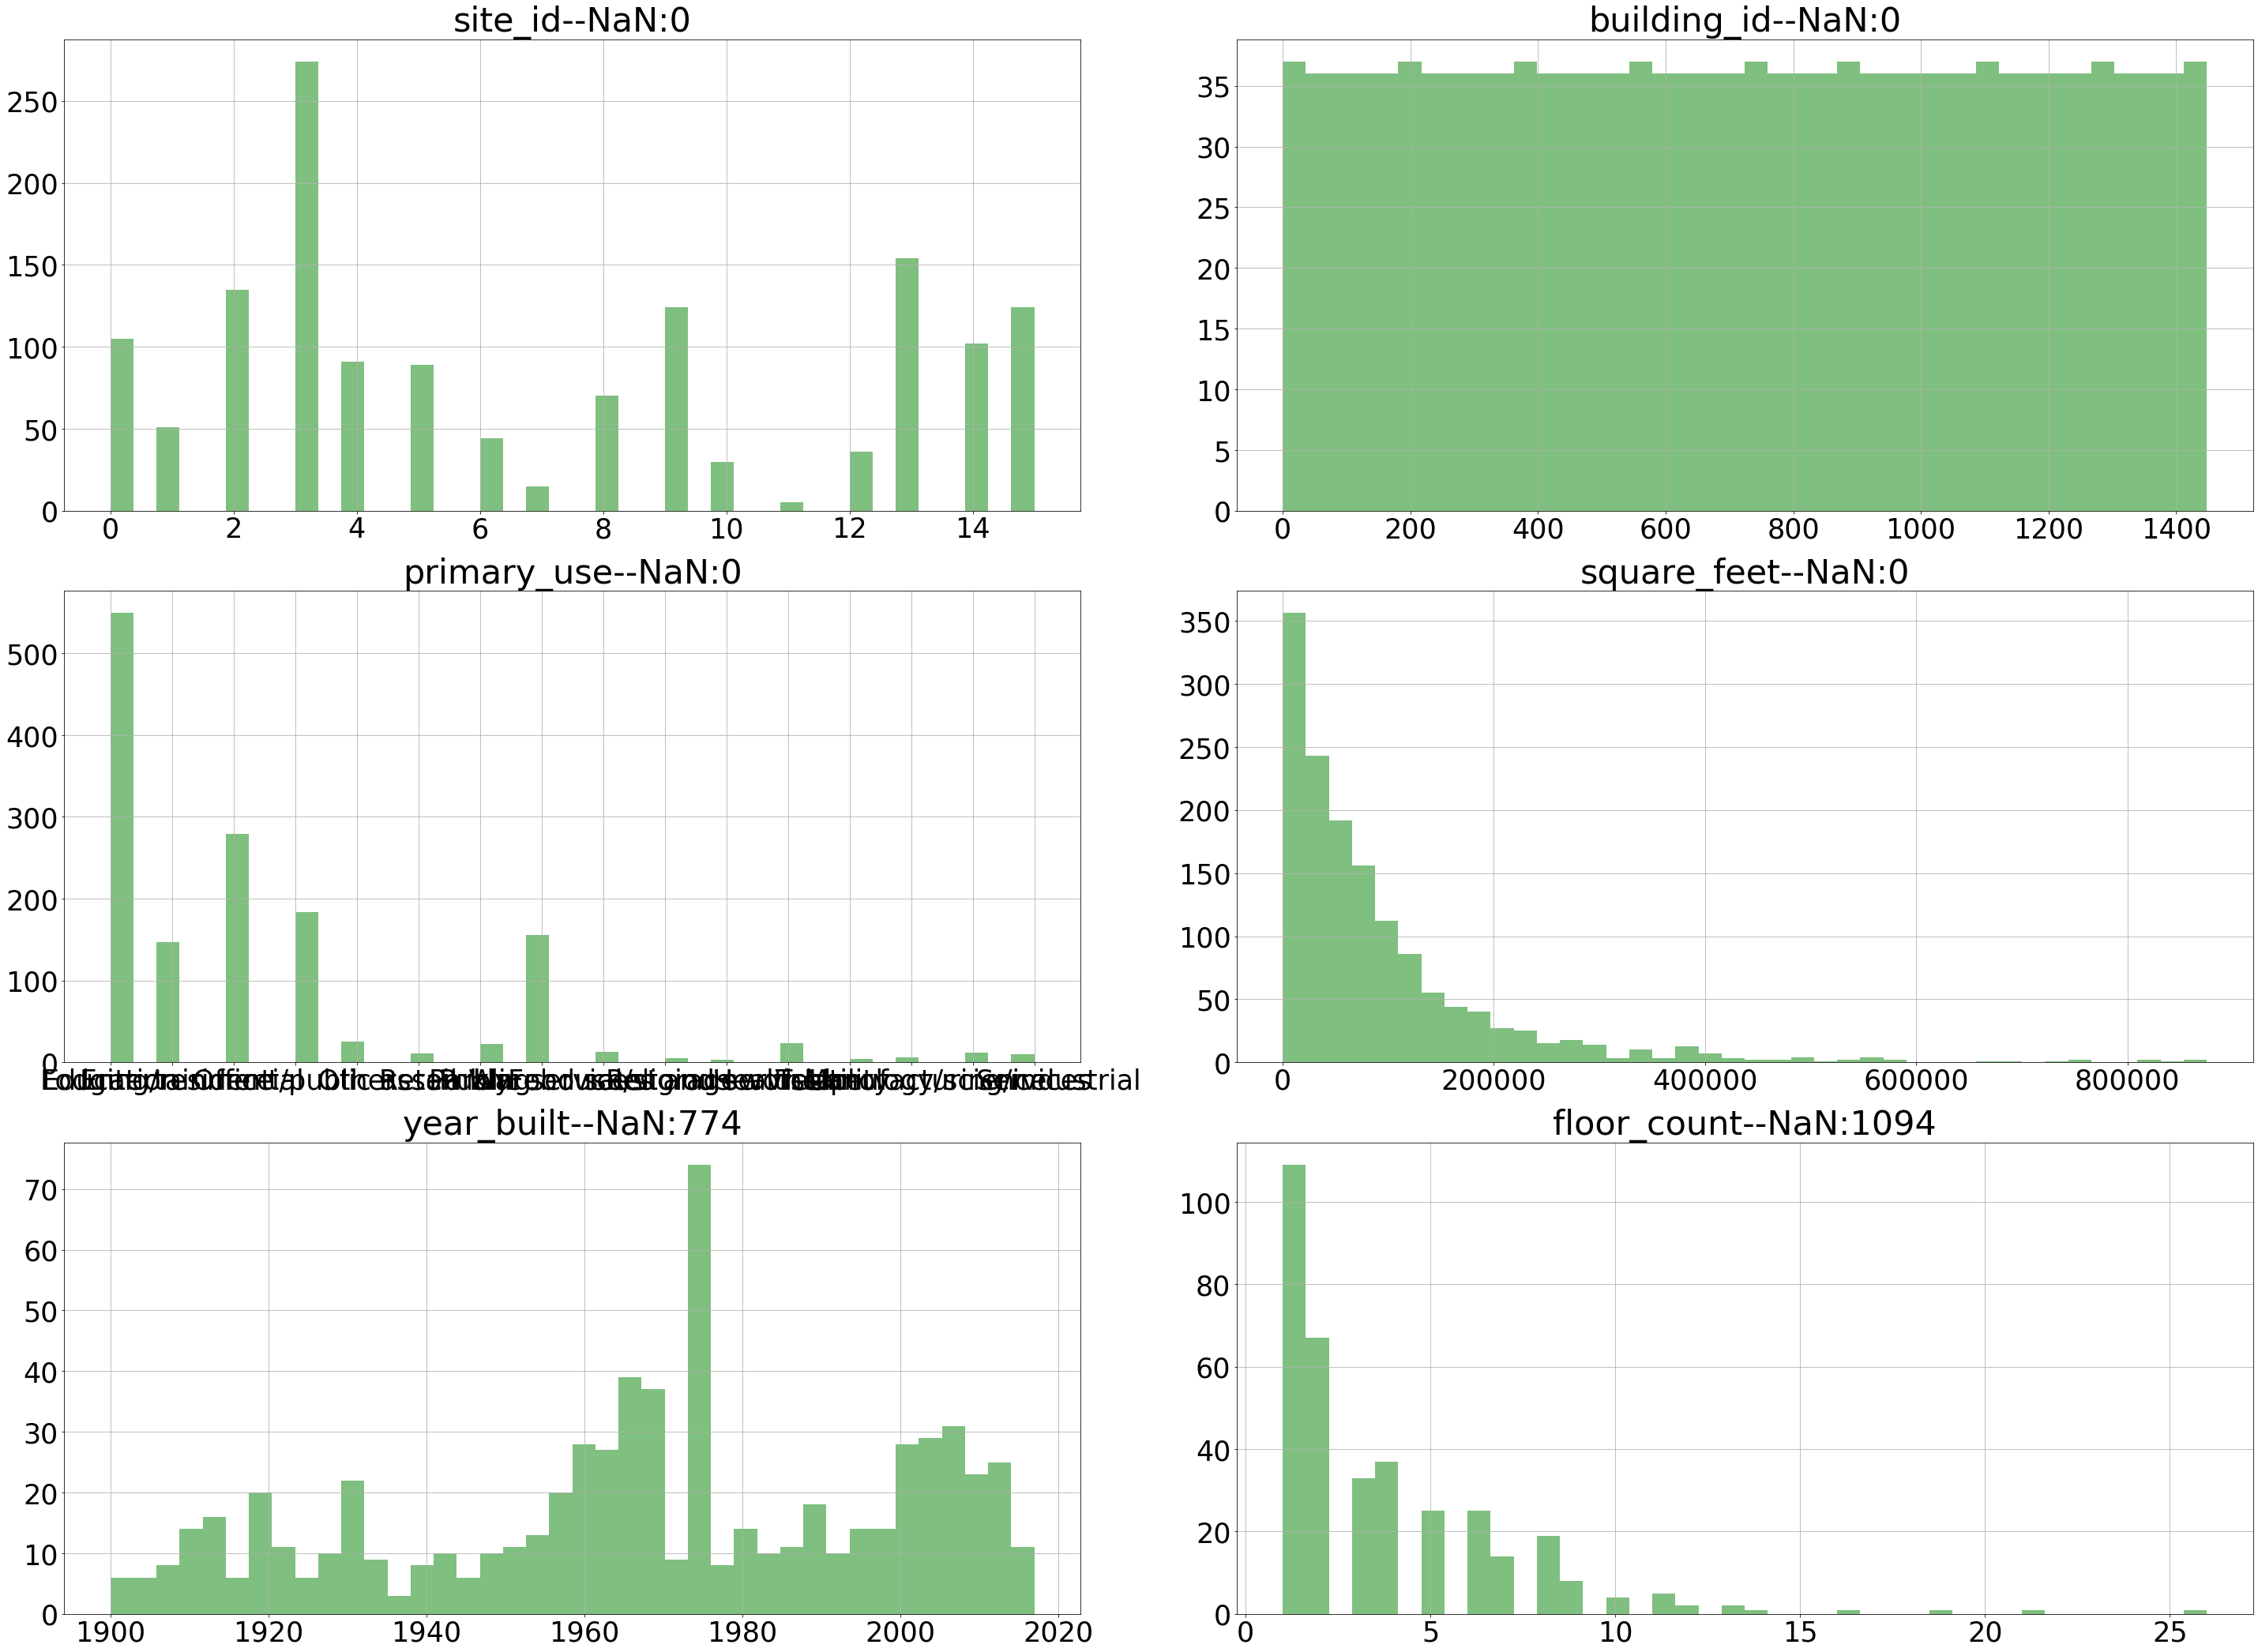

In [9]:
missing_columns = np.sum(building.isnull())
draw_histograms(building,building.columns,missing_columns, 19,2)

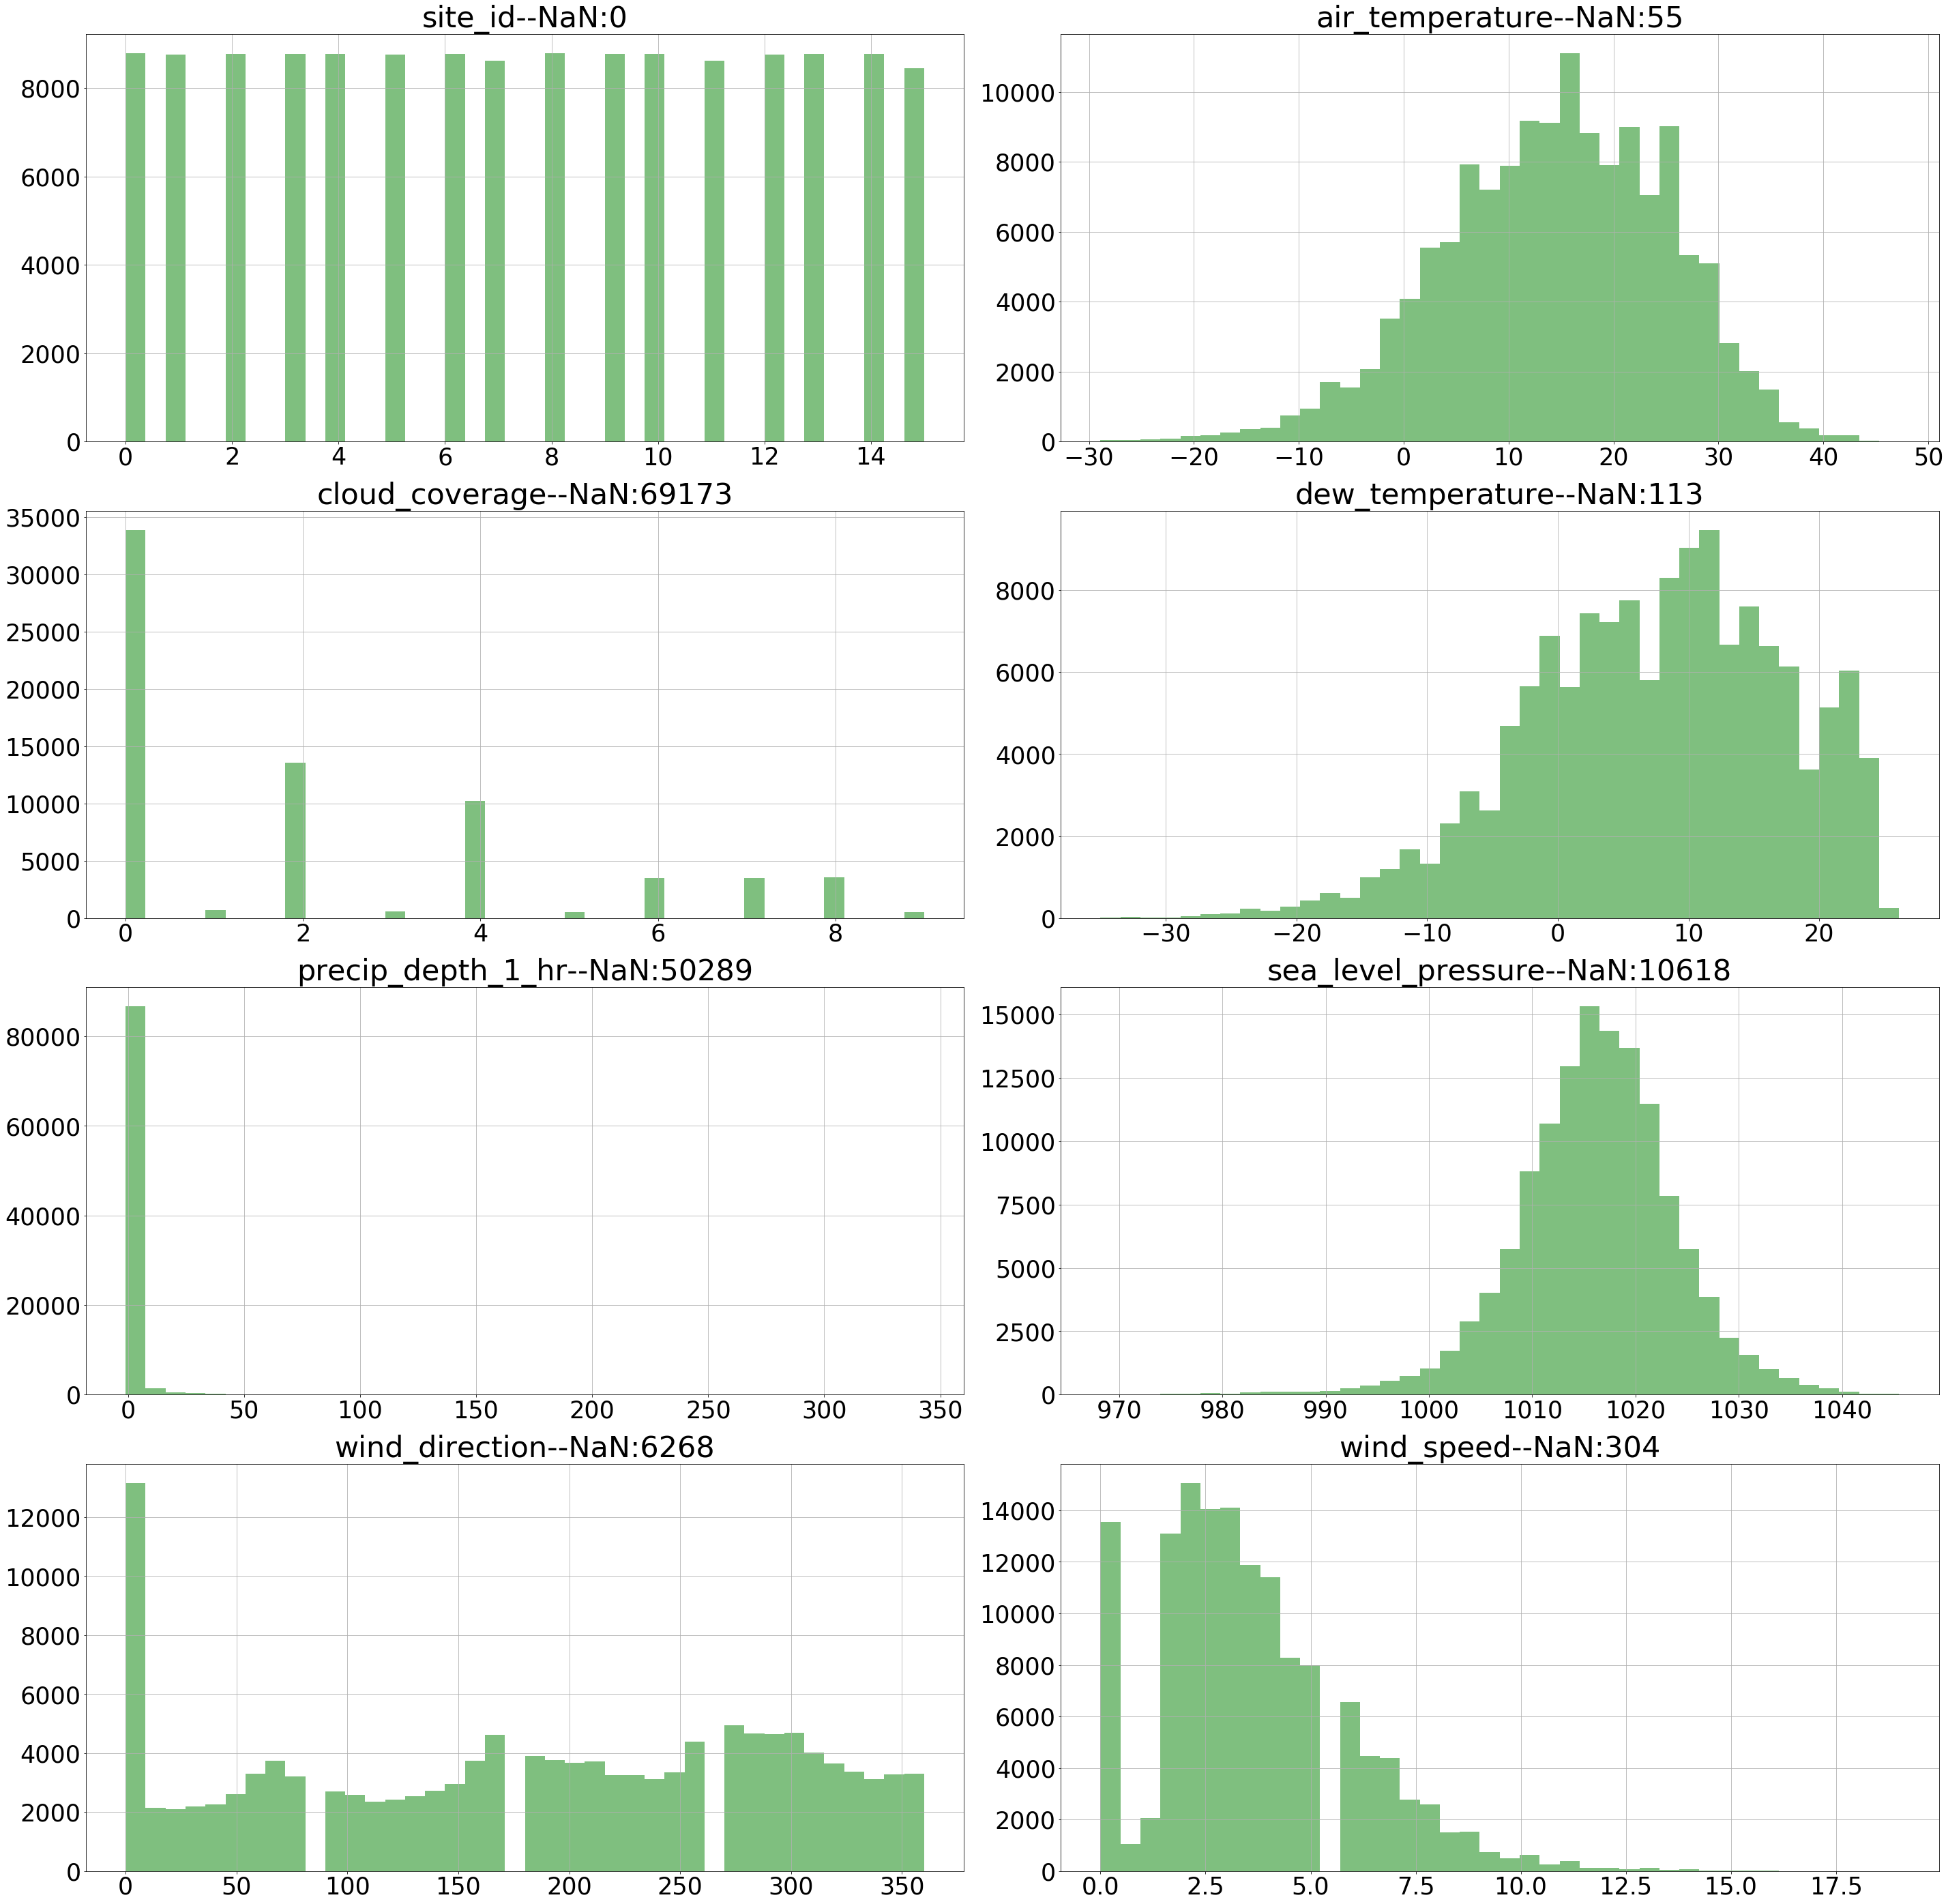

In [10]:
weather_train_notime = weather_train.drop('timestamp',axis = 1)
missing_weather_train = np.sum(weather_train_notime.isnull())
draw_histograms(weather_train_notime,weather_train_notime.columns,missing_weather_train, 19,2)

### Merge and split data from different tables

#### split train data by different meters

In [40]:
'''train_meter0 = train.query('meter == 0').drop('meter',axis=1)
train_meter1 = train.query('meter == 1').drop('meter',axis=1)
train_meter2 = train.query('meter == 2').drop('meter',axis=1)
train_meter3 = train.query('meter == 3').drop('meter',axis=1)'''

In [41]:
'''del train_meter0 
del train_meter1
del train_meter2
del train_meter3'''

'del train_meter0 \ndel train_meter1\ndel train_meter2\ndel train_meter3'

now we are going to do Data Cleaning for building weather seperately before merge them with training Y. 
then we need to do data Cleaning for Y too given there are lots of zero meter reading values observed.

## Data Cleaning

take a look at the data

In [11]:
build_corr = building.corr()

In [12]:
build_corr

,site_id,building_id,square_feet,year_built,floor_count
site_id,1.000000,0.977283,0.082136,-0.187021,-0.468542
building_id,0.977283,1.000000,0.074312,-0.230185,-0.482477
square_feet,0.082136,0.074312,1.000000,0.109063,0.530298
year_built,-0.187021,-0.230185,0.109063,1.000000,0.099393
floor_count,-0.468542,-0.482477,0.530298,0.099393,1.000000


In [13]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
floor_count    355 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


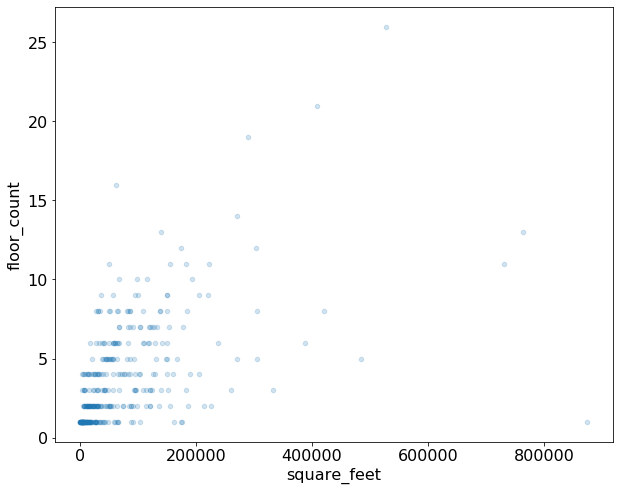

In [14]:
building.plot(kind='scatter',x = 'square_feet',y = 'floor_count', alpha=0.2, figsize=[10,8])

In [15]:
building.query('square_feet>800000')

,site_id,building_id,primary_use,square_feet,year_built,floor_count
269,2,269,Entertainment/public assembly,809530,1958.0,NaN
365,3,365,Healthcare,819577,1922.0,NaN
375,3,375,Office,850354,1989.0,NaN
869,8,869,Entertainment/public assembly,875000,NaN,1.0
1148,13,1148,Office,861524,NaN,NaN


In [16]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [17]:
weather_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null int64
timestamp             277243 non-null object
air_temperature       277139 non-null float64
cloud_coverage        136795 non-null float64
dew_temperature       276916 non-null float64
precip_depth_1_hr     181655 non-null float64
sea_level_pressure    255978 non-null float64
wind_direction        264873 non-null float64
wind_speed            276783 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.0+ MB


In [18]:
weather_corr = weather_train.corr()
weather_corr

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
site_id,1.000000,-0.262746,0.021003,-0.204501,0.020269,-0.009193,0.045021,0.027688
air_temperature,-0.262746,1.000000,0.010149,0.790386,-0.010719,-0.209317,-0.093240,-0.056743
cloud_coverage,0.021003,0.010149,1.000000,0.183606,0.122253,-0.158361,0.052560,0.294019
dew_temperature,-0.204501,0.790386,0.183606,1.000000,0.065881,-0.168759,-0.149033,-0.096836
precip_depth_1_hr,0.020269,-0.010719,0.122253,0.065881,1.000000,-0.081343,-0.013161,0.035023
sea_level_pressure,-0.009193,-0.209317,-0.158361,-0.168759,-0.081343,1.000000,-0.103002,-0.251602
wind_direction,0.045021,-0.093240,0.052560,-0.149033,-0.013161,-0.103002,1.000000,0.354690
wind_speed,0.027688,-0.056743,0.294019,-0.096836,0.035023,-0.251602,0.354690,1.000000


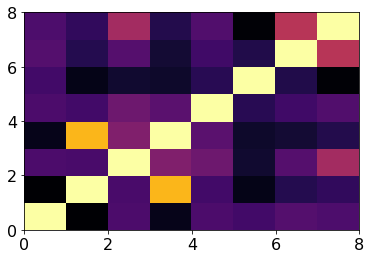

In [19]:
# heat map
plt.pcolor(weather_corr,cmap=plt.get_cmap('inferno'))

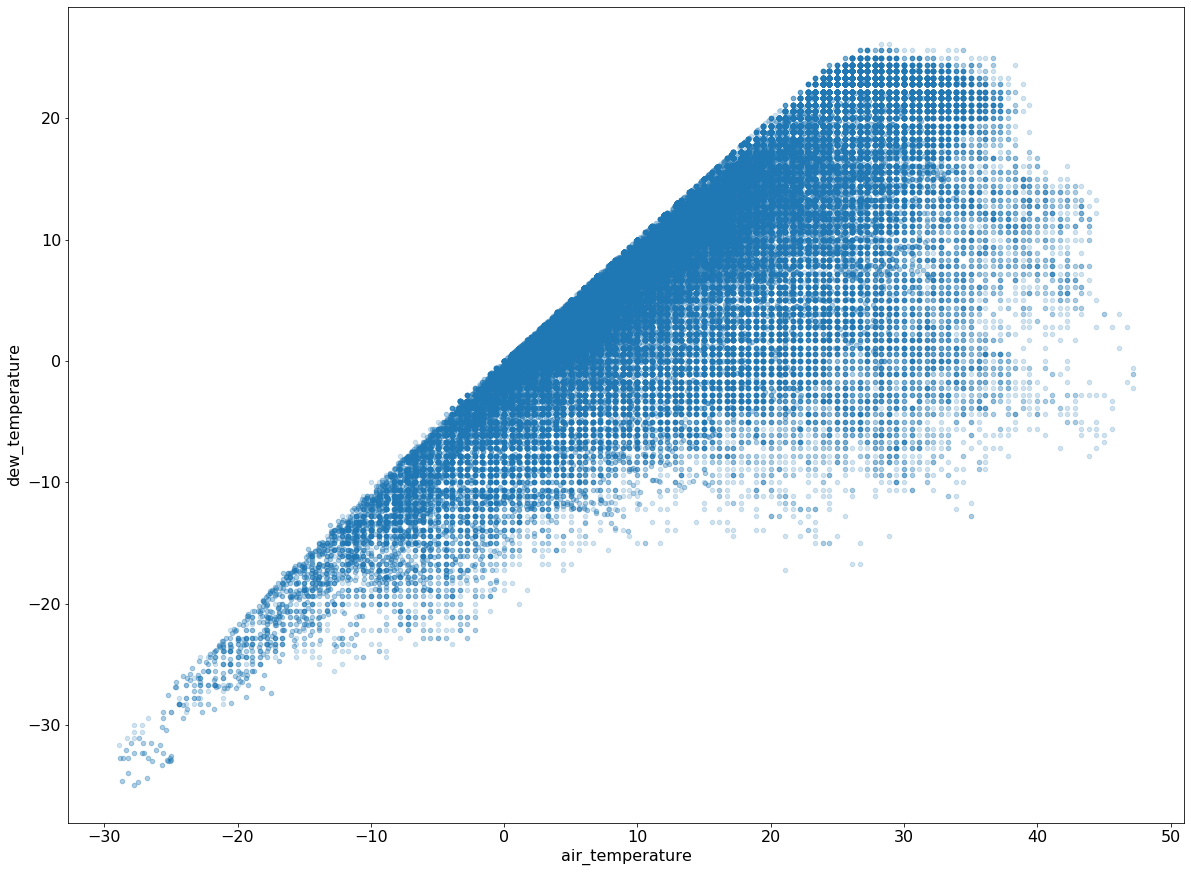

In [20]:
weather_train.plot(kind='scatter',x = 'air_temperature',y = 'dew_temperature', alpha= 0.2, figsize=[20,15])

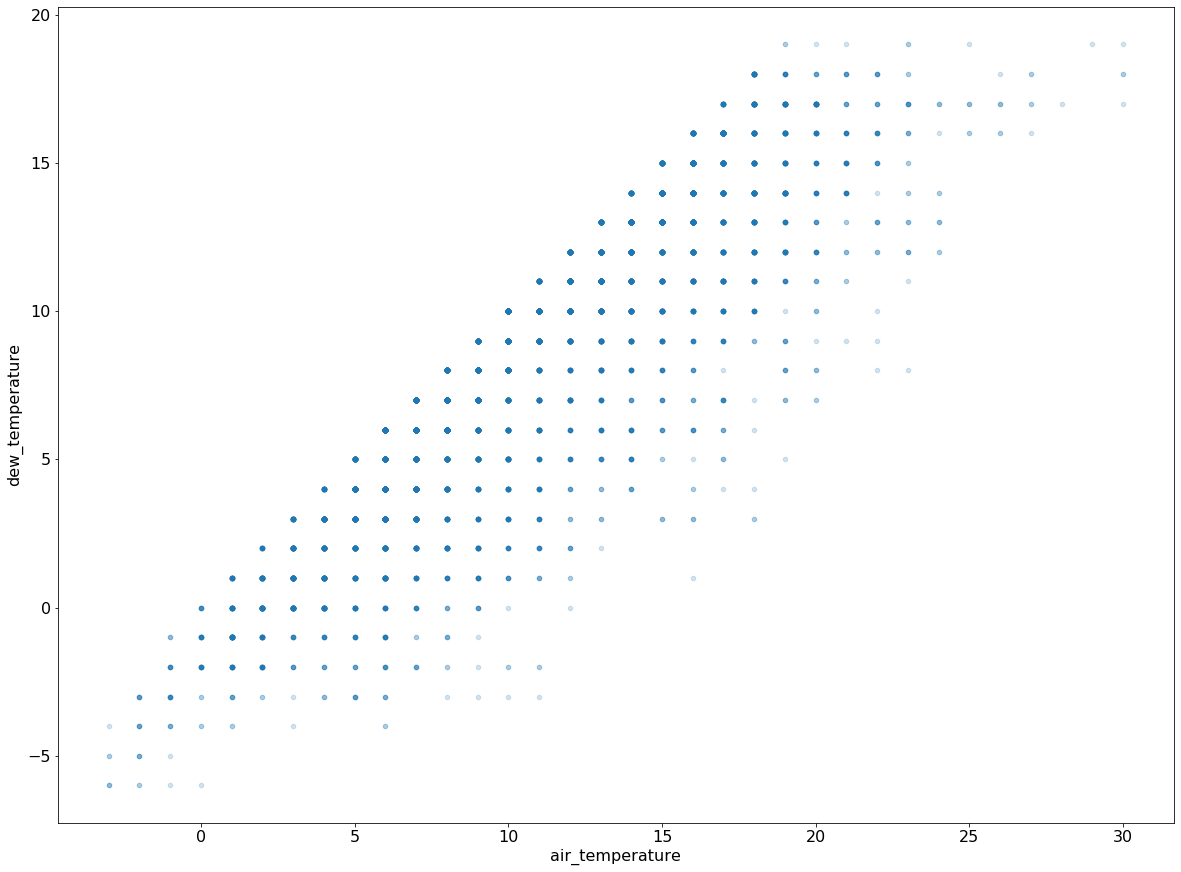

In [21]:
weather_train.query('site_id==5').plot(kind='scatter',x = 'air_temperature',y = 'dew_temperature', alpha= 0.2, figsize=[20,15])

In [22]:
weather_train.query('site_id == 0').iloc[100:150]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
100,0,2016-01-05 04:00:00,11.7,0.0,6.1,0.0,1021.2,360.0,5.7
101,0,2016-01-05 05:00:00,10.6,0.0,6.1,0.0,1021.3,350.0,4.1
102,0,2016-01-05 06:00:00,10.0,0.0,6.1,0.0,1020.9,360.0,4.1
103,0,2016-01-05 07:00:00,10.6,0.0,6.1,0.0,1020.9,360.0,4.6
104,0,2016-01-05 08:00:00,10.6,0.0,6.7,0.0,1020.8,360.0,5.1
105,0,2016-01-05 09:00:00,10.0,0.0,6.7,0.0,1021.5,360.0,4.6
106,0,2016-01-05 10:00:00,10.6,0.0,6.7,0.0,1022.2,360.0,4.6
107,0,2016-01-05 11:00:00,11.1,0.0,6.7,0.0,1022.5,10.0,5.1
108,0,2016-01-05 12:00:00,11.7,2.0,7.8,0.0,1023.1,20.0,7.2
109,0,2016-01-05 13:00:00,12.2,4.0,7.8,0.0,1023.7,10.0,6.7


In Weather_train, there are NaN values for some of features, spot check different time for them, they all show continuity on timestamp to fill NA for them ,I think it should be acurat enough just filling NA with avg of previous one + next one

### Data Cleaning for building weather

In [24]:
weather_train.shape, weather_test.shape

((139773, 9), (277243, 9))

In [25]:
# combine weather train and test set
merge_weather =  pd.concat([weather_train,weather_test],axis=0, sort=False, ignore_index=True)

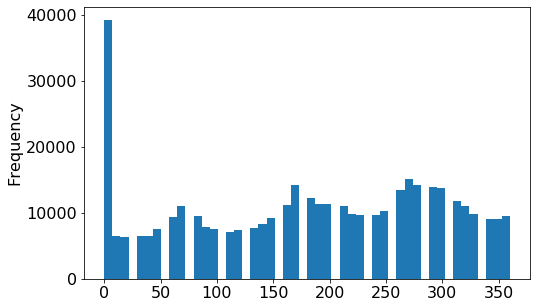

In [26]:
merge_weather.wind_direction.plot.hist(bins=50, figsize=(8,5))

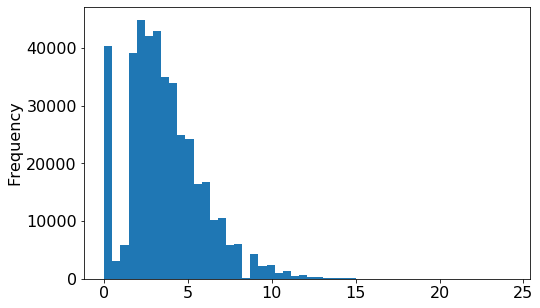

In [27]:
merge_weather.wind_speed.plot.hist(bins=50, figsize=(8,5))

when the wind_speed is 0, the direction should be 0, 
two graphs above show the number of 0s in wind_speed is less than the one in wind_direction,
there might be some error data or null data in wind_direction that I should fill it with 0. 
---- below results tells me there are 40462-39206 = 1.2k this type of data, and they are either 360 or nan, I should replace them with 0

In [28]:
merge_weather.query('wind_speed == 0').shape, merge_weather.query('wind_direction == 0').shape

((40462, 9), (39206, 9))

In [29]:
merge_weather.query('wind_speed == 0 and wind_direction != 0').wind_direction.unique()

array([360.,  nan])

now I will look at square_feet, below two graph shows that lots of building are around the size of 10000 sq ,I will fill the NA with 10000 sq

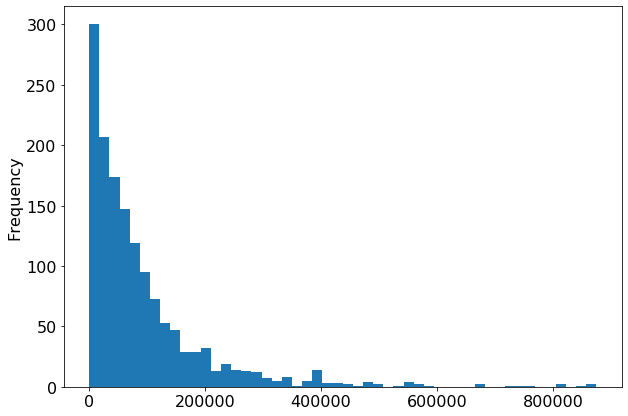

In [30]:
building.square_feet.plot.hist(bins=50,figsize=(10,7))

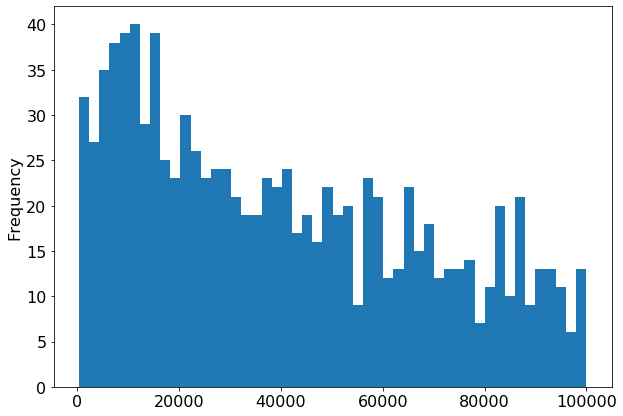

In [31]:
building[building.square_feet<100000].square_feet.plot.hist(bins=50,figsize=(10,7))

In [32]:
building[building.square_feet<18000].shape

(302, 6)

start designing the pipelines, I want them to do couple things:
1. data cleaning for building
2. data cleaning for weather
3. transform features
4. create new features

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [37]:
# dataFrameSelector
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].copy()
    #.copy().values.reshape(-1, 1)

# onehot_encoder_id for building_id
class onehot_encoder_id(  BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        bid = x.values
        onehot_matrix = np.zeros((bid.size, bid.max()+1))
        onehot_matrix[np.arange(bid.size),bid] = 1
        # in the future I can implement the deletion of the first column to save 1 additional feature.
        return onehot_matrix
    
# myImputer
class myNAImputer( BaseEstimator, TransformerMixin):
    def __init__(self, strategy = np.nan, value = np.nan ):
        self.strategy = strategy
        self.value = value
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        if self.value != np.nan:
            fill_value = self.value
        if self.strategy == 'mode':
            if type(x) == pd.core.series.Series:
                fill_value = x.mode().to_dict()[0]
            else:
                fill_value = x.mode().to_dict('index')[0]
        return x.fillna(value = fill_value).values.reshape(-1,1)

# onehot_encoder
class onehot_encoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        if type(x) == np.ndarray:
            x = pd.DataFrame(x)
        return pd.get_dummies(x, drop_first=True).values
    
# neighboour_avg_imputer
# fill the null with value from previous row
class neighboour_avg_imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self,x):
        for column in x.columns:
            # get all indexes of null rows
            null_idx = list(x[x[column].isnull()].index)
            for each in null_idx:
                # nxt_deviate = 1
                # while((each + nxt_deviate) in null_idx):
                #     nxt_deviate += 1

                # fill the null with the value from previous row
                x[column][each] = x[column][each - 1]
        return x

# wind_dir_imputer: 
# 1. fill NaN with the value from previous row
# 2. transfer all 0 wind direction with non-0 wind speed to 360 -- if there is wind, the direction is 360
# 3. transfer all the wind direction with 0 wind speed to 0 -- if no wind, the direction is 0
# 3. bin data into four directions, plus no wind (with direction of 0)
class wind_dir_imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        # fill rest of NaN with the value from previous row
        null_idx = list(x[x.wind_direction.isnull()].index)
        for each in null_idx:
            x.wind_direction[each]=x.wind_direction[each-1]
        
        # transform all 0 wind direction with non-0 wind speed to 360
        x.query('wind_speed != 0 and wind_direction == 0.0').wind_direction = 360.0
        
        # tranform all the non-0 wind direction with 0 wind speed to 0
        x.query('wind_speed == 0 and wind_direction != 0').wind_direction = 0.0
        
        wind_dir = x.wind_direction.copy()
        
        # bin data into four direction plus no wind:
        # east:
        wind_dir[((x.wind_direction>0) & (x.wind_direction<=45))] = 'East'
        wind_dir[((x.wind_direction>315) & (x.wind_direction<=360))] = 'East'
        # north:
        wind_dir[((x.wind_direction>45) & (x.wind_direction<=135))] = 'North'
        # west:
        wind_dir[((x.wind_direction>135) & (x.wind_direction<=225))] = 'West'
        # south:
        wind_dir[((x.wind_direction>225) & (x.wind_direction<=315))] = 'South'
        # no wind:
        wind_dir[x.wind_direction == 0] = 'noWind'
        return wind_dir.values
        
# FeatureCreator: create feature: air_temperature/dew_temperature
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return ( (x.dew_temperature+100) / (x.air_temperature+100)).values.reshape(-1,1)

In [38]:
airtemp_sealev = ['air_temperature','sea_level_pressure']
dewtemp_windsp = ['dew_temperature','wind_speed']
buildId_primuse = ['building_id','primary_use']

onehot_building_id_pipline = Pipeline([
    ('selector', DataFrameSelector('building_id')),
    ('onehot_encod_id', onehot_encoder_id())
])

onehot_pipeline = Pipeline([
    ('selector', DataFrameSelector('primary_use')),
    ('imputer', myNAImputer(strategy='mode')),
    ('onehot_encod', onehot_encoder())
])
square_feet_pipeline = Pipeline([
    ('selector',DataFrameSelector('square_feet')),
    ('imputer', myNAImputer( value=10000 )),
    ('Rob_scaler', RobustScaler()),
    ('mm_scaler',MinMaxScaler())
])
airtemp_sealev_pipeline = Pipeline([
    ('selector', DataFrameSelector(airtemp_sealev)),
    ('imputer', neighboour_avg_imputer()),
    ('std_scaler', StandardScaler()),
    ('mm_scaler', MinMaxScaler())    
])
dewtemp_windsp_pipeline = Pipeline([
    ('selector', DataFrameSelector(dewtemp_windsp)),
    ('imputer', neighboour_avg_imputer()),
    ('Rob_scaler', RobustScaler()),
    ('mm_scaler', MinMaxScaler())
])
wind_dir_pipeline = Pipeline([
    ('Selector', DataFrameSelector(['wind_direction','wind_speed'])),
    ('Imputer', wind_dir_imputer()),
    ('onehot_encoder', onehot_encoder())
])
new_feature_pipeline = Pipeline([
    ('Selector', DataFrameSelector(['air_temperature','dew_temperature'])),
    ('FeaturesCreater', FeatureCreator())
    #('Rob_scaler', RobustScaler()),
    #('mm_scaler', MinMaxScaler())
])

In [39]:
# debug each pipeline
test_array = onehot_pipeline.fit_transform(building)
test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
# two full pipelines: building and weather:

# not going to create 1hot for building_id, which will have more than 1400 dimentions. 
# I will implement embedding layer for building_id in the NN.
building_full_pipeline = FeatureUnion(transformer_list=[
#    ('building_id', onehot_building_id_pipline),
    ('prim_use', onehot_pipeline),
    ('sqr_feet', square_feet_pipeline)
])
weather_full_pipeline = FeatureUnion(transformer_list=[
    ('airtemp_sealev', airtemp_sealev_pipeline),
    ('dewtemp_windsp', dewtemp_windsp_pipeline),
    ('wind_dir', wind_dir_pipeline),
    ('new_feature', new_feature_pipeline)
])

In [42]:
# start to run the pipelines
building_prepared = building_full_pipeline.fit_transform(building)
building_prepared, building_prepared.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00817293],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00278604],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00582245],
        ...,
        [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.01255492],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.03371605],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.10516316]]), (1449, 16))

In [43]:
merge_weather_prepared = weather_full_pipeline.fit_transform(merge_weather)
merge_weather_prepared

C:\Users\raymond.guo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([[0.69818653, 0.62881563, 0.89141005, ..., 0.        , 1.        ,
        0.96      ],
       [0.69041451, 0.63492063, 0.90923825, ..., 0.        , 0.        ,
        0.97347267],
       [0.66968912, 0.63492063, 0.90923825, ..., 0.        , 1.        ,
        0.98615635],
       ...,
       [0.41062176, 0.5982906 , 0.59481361, ..., 1.        , 0.        ,
        0.98929961],
       [0.41062176, 0.58485958, 0.60291734, ..., 1.        , 0.        ,
        0.99416342],
       [0.41709845, 0.56776557, 0.60291734, ..., 1.        , 0.        ,
        0.9893514 ]])

In [44]:
building.shape, building_prepared.shape

((1449, 6), (1449, 16))

In [45]:
merge_weather.shape , merge_weather_prepared.shape

((417016, 9), (417016, 9))

#### now we need to add the site_id, building_id, timestamp back to these two prepared data set.

In [46]:
building_prepared_df = pd.DataFrame(building_prepared)
building_prepared_df = pd.concat([building[['site_id','building_id']],building_prepared_df], axis=1)
building_prepared_df

,site_id,building_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008173
1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002786
2,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005822
3,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026754
4,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,15,1444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022105
1445,15,1445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004590
1446,15,1446,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012555
1447,15,1447,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033716


In [54]:
merge_weather_prepared_df = pd.DataFrame(merge_weather_prepared)
merge_weather_prepared_df = pd.concat([merge_weather[['site_id','timestamp']],merge_weather_prepared_df], axis=1)
merge_weather_prepared_df.columns = ['site_id','timestamp','airtemp','sealev','dewtemp','windsp',
                                     'North','West','South','nowind','dewair']
merge_weather_prepared_df

,site_id,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair
0,0,2016-01-01 00:00:00,0.698187,0.628816,0.891410,0.000000,0.0,0.0,0.0,1.0,0.960000
1,0,2016-01-01 01:00:00,0.690415,0.634921,0.909238,0.061983,1.0,0.0,0.0,0.0,0.973473
2,0,2016-01-01 02:00:00,0.669689,0.634921,0.909238,0.000000,0.0,0.0,0.0,1.0,0.986156
3,0,2016-01-01 03:00:00,0.647668,0.633700,0.901135,0.000000,0.0,0.0,0.0,1.0,0.995871
4,0,2016-01-01 04:00:00,0.633420,0.632479,0.891410,0.107438,0.0,1.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
417011,15,2018-12-31 19:00:00,0.417098,0.611722,0.594814,0.318182,0.0,0.0,1.0,0.0,0.984511
417012,15,2018-12-31 20:00:00,0.410622,0.605617,0.585089,0.210744,0.0,0.0,1.0,0.0,0.983463
417013,15,2018-12-31 21:00:00,0.410622,0.598291,0.594814,0.256198,0.0,0.0,1.0,0.0,0.989300
417014,15,2018-12-31 22:00:00,0.410622,0.584860,0.602917,0.210744,0.0,0.0,1.0,0.0,0.994163


In [55]:
merge_weather_prepared_df[10:13]

,site_id,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair
10,0,2016-01-01 10:00:00,0.647668,0.612943,0.901135,0.000000,0.0,0.0,0.0,1.0,0.995871
11,0,2016-01-01 11:00:00,0.641192,0.619048,0.891410,0.000000,0.0,0.0,0.0,1.0,0.995025
12,0,2016-01-01 12:00:00,0.619171,0.622711,0.873582,0.061983,0.0,0.0,1.0,0.0,1.000000


In [50]:
weather_train.shape, weather_test.shape

((139773, 9), (277243, 9))

In [51]:
del building
del weather_train
del weather_test

In [56]:
train_build_weather = pd.merge(left = building_prepared_df, right = merge_weather_prepared_df[:139773],
                              left_on='site_id', right_on = 'site_id')

In [58]:
train_build_weather.head(10)

,site_id,building_id,0,1,2,3,4,5,6,7,...,timestamp,airtemp,sealev,dewtemp,windsp,North,West,South,nowind,dewair
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 00:00:00,0.698187,0.628816,0.891410,0.000000,0.0,0.0,0.0,1.0,0.960000
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 01:00:00,0.690415,0.634921,0.909238,0.061983,1.0,0.0,0.0,0.0,0.973473
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 02:00:00,0.669689,0.634921,0.909238,0.000000,0.0,0.0,0.0,1.0,0.986156
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 03:00:00,0.647668,0.633700,0.901135,0.000000,0.0,0.0,0.0,1.0,0.995871
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 04:00:00,0.633420,0.632479,0.891410,0.107438,0.0,1.0,0.0,0.0,1.000000
5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 05:00:00,0.625648,0.632479,0.881686,0.000000,0.0,0.0,0.0,1.0,1.000000
6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 06:00:00,0.647668,0.625153,0.909238,0.000000,0.0,0.0,0.0,1.0,1.000000
7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 07:00:00,0.647668,0.617827,0.909238,0.061983,0.0,0.0,1.0,0.0,1.000000
8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 08:00:00,0.641192,0.609280,0.891410,0.000000,0.0,0.0,0.0,1.0,0.995025
9,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2016-01-01 09:00:00,0.647668,0.620269,0.901135,0.061983,0.0,1.0,0.0,0.0,0.995871


In [59]:
test_build_weather = pd.merge(left = building_prepared_df, right = merge_weather_prepared_df[139773:],
                              left_on='site_id', right_on = 'site_id')

In [62]:
## Function to reduce the memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [63]:
train_build_weather = reduce_mem_usage(train_build_weather)
test_build_weather = reduce_mem_usage(test_build_weather)

Mem. usage decreased from 2804.63 Mb to 834.14 Mb (70.3% reduction)
Mem. usage decreased from 5591.93 Mb to 1663.12 Mb (70.3% reduction)


In [ ]:
# save the prepared data:
%time
train_build_weather.to_csv('C:/data/Kaggle_ASHRAE_energy/train_build_weather.csv', index = False)
test_build_weather.to_csv('C:/data/Kaggle_ASHRAE_energy/test_build_weather.csv', index = False)

In [ ]:
del train_build_weather
del train_build_weather